## Amazon product co-purchasing network

Source: [SNAP-Stanford](https://snap.stanford.edu/data/com-Amazon.html)

Dataset statistics:

- Nodes: 334863
- Edges: 925872
- Nodes in the largest WCC: 334863 (1.000)
- Edges in the largest WCC: 925872 (1.000)
- Average clustering coefficient: 0.3967
- Number of triangles: 667129
- Fraction of closed triangles: 0.07925
- Diameter: 44
- 90-percentile effective diameter: 15

In [50]:
import networkx as nx
import numpy as np
import pylab as pl
import scipy as sp
import time
import random
import queue
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

# Data location
raw_data_loc = '../data/raw/amazon_copurchasing/'
data_loc = '../ data/amazon_copurchasing/'
raw_graph_file = raw_data_loc + 'com-amazon.ungraph.txt'
raw_com_file = raw_data_loc + 'com-amazon.all.dedup.cmty.txt'
top5k_com_file = raw_data_loc + 'com-amazon.top5000.cmty.txt'

## Load graph

NetworkX is used to load the graph from the ```raw_graph_file``` and check for basic metrics (statistics).

In [2]:
g = nx.read_edgelist(raw_graph_file)

In [3]:
N, K = g.order(), g.size()
avg_deg = K / N

print("Number of nodes: ", N)
print("Number of edges: ", K)
print("Average degree: ", avg_deg)

Number of nodes:  334863
Number of edges:  925872
Average degree:  2.7649277465709856


## Degree distribution

In [4]:
degrees = g.degree()
degrees_vals = sorted(set(degrees.values()))
hist = [list(degrees.values()).count(v) for v in degrees_vals]

(0, 200)

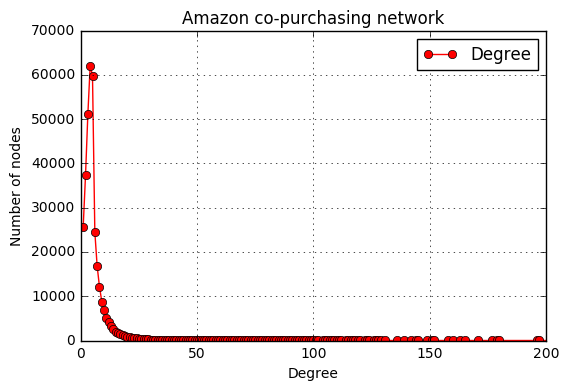

In [5]:
plt.figure()
plt.grid(True)
plt.plot(degrees_vals, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Amazon co-purchasing network')
plt.xlim([0, 2*10**2])

(1.0, 200)

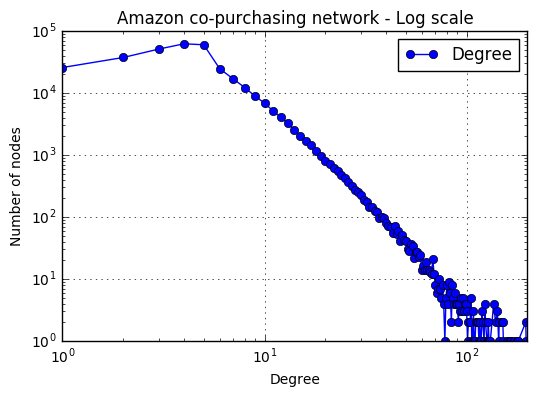

In [6]:
plt.figure()
plt.grid(True)
plt.loglog(degrees_vals, hist, 'bo-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Amazon co-purchasing network - Log scale')
plt.xlim([0, 2*10**2])

Testing the code for fitting function in scipy. Check back later at [Cookbook Scipy](http://scipy.github.io/old-wiki/pages/Cookbook/FittingData#CA-029e9ae12c0592e5c90cf64b2b75493a82c5351b_12).

In [7]:
num_points = 150
Tx = sp.linspace(5., 8., num_points)
Ty = Tx

tX = 11.86 * sp.cos(2*sp.pi/0.81*Tx-1.32) + \
     0.64 * Tx + 4 * ((0.5 -sp.rand(num_points)) * \
                     sp.exp(2*sp.rand(num_points)**2))
tY = tY = -32.14*sp.cos(2*sp.pi/0.8*Ty-1.94) + 0.15*Ty+7* \
          ((0.5-sp.rand(num_points))*sp.exp(2*sp.rand(num_points)**2))

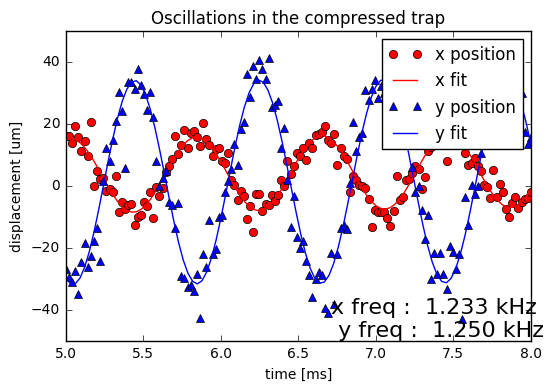

In [8]:
# Fit the first set
fitfunc = lambda p, x: p[0]*sp.cos(2*sp.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = sp.optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

time = sp.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = sp.optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = sp.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
     'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
     fontsize=16,
     horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)

(0, 200)

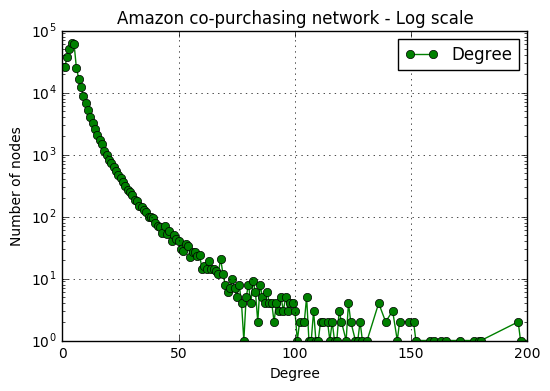

In [9]:
plt.figure()
plt.grid(True)
plt.semilogy(degrees_vals, hist, 'go-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Amazon co-purchasing network - Log scale')
plt.xlim([0, 2*10**2])

From the log-log plot (blue), we can be almost certain that the degree distribution of this Amazon network follows the power law.

## Clustering coefficient

Clustering coeffient only works on undirected graph. We can get the clustering coeffient for all the nodes  or single node:

In [10]:
print('Clustering coefficient of node 1:')
print(nx.clustering(g, ['1']))

Clustering coefficient of node 1:
{'1': 0.4642857142857143}


Computing the average clustering coefficient

In [11]:
clust_coefficients = nx.clustering(g)
print(type(clust_coefficients))
avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
print(avg_clust)

<class 'dict'>
0.39674639327875105


In [12]:
# Built-in function for clustering coefficient
nx.average_clustering(g)

0.39674639327875105

## Node centralities

The centrality metrics can be computed with:

```python
bet_cen = nx.betweenness_centrality(g)
clo_cen = nx.closeness_centrality(g)
eig_cen = nx.eigenvector_centrality(g)
```

Due to the time it takes to compute this large graph, I did not perform the operation mentioned above.

In [139]:
# Python 3.5.2 syntax
def get_top_keys(dictionary, top):
    items = list(dictionary.items())
    items.sort(reverse=True, key=lambda x: x[1])
    return list(map(lambda x: x[0], items[:top]))

```get_top_keys``` function returns the top nodes in networkx's centrality metrics.

In [115]:
def get_subgraph_bfs(graph, start_node, num_node):
    # TODO: Function docs
    # TODO: Input checking
    # TODO: Testing
    node_set = set()
    probbed = {start_node}
    bfs_queue = queue.deque()
    bfs_queue.append(start_node)
    while len(bfs_queue) > 0:
        i = bfs_queue.popleft()
        node_set.add(i)
        for j in g[i]:
            if j not in probbed:
                probbed.add(j)
                bfs_queue.append(j)
        if len(node_set) >= num_node:
            return nx.subgraph(graph, node_set)

```get_subgraph_bfs``` function returns the subgraph of the ```graph``` using breath first search starting from ```start_node```.

In [116]:
# Return subgraph of 1000 nodes in networkx undirect graph format
sub1k = get_subgraph_bfs(g, '1', 1000)

In [117]:
bet_cen_sub1k = nx.betweenness_centrality(sub1k)

In [118]:
bet_cen_sub1k['1']

0.004762309063487955

In [141]:
get_top_keys(bet_cen_sub1k, 10)

['118052',
 '143523',
 '244916',
 '8487',
 '301309',
 '43763',
 '161555',
 '492325',
 '150819',
 '335464']